In this post we will use [Case Western Reserve University Bearnig](https://csegroups.case.edu/bearingdatacenter/pages/welcome-case-western-reserve-university-bearing-data-center-website) data set for our multiclass classification problem. 

## Description of dataset

A bearing has four major parts: inner race, outer race, rolling element and cage. Fault can occur in any of these components. The CWRU data set contains bearing data consisting of inner race fault, outer race fault and ball defect. A baseline (normal) bearing data with no faults is also available. Some data are collected at a sampling frequency of 12 kHz and some other are collected at 48 kHz. In this study, we will only consider data acquired at 48 kHz sampling frequency. The faults have varying fault depths (0.007 inch, 0.014 inch, 0.021 inch). There is also load variation in motor (No load, 1 hp, 2 hp, 3hp). For this study, we will consider all the data with 1 hp external load.

There are 10 classes for this external load (1 hp). The classes are:


* C1  : Ball defect (0.007 inch)
* C2  : Ball defect (0.014 inch)
* C3  : Ball defect (0.021 inch)
* C4  : Inner race fault (0.007 inch)
* C5  : Inner race fault (0.014 inch)
* C6  : Inner race fault (0.021 inch)
* C7  : Normal
* C8  : Outer race fault (0.007 inch, data collected from 6 O'clock position)
* C9  : Outer race fault (0.014 inch, 6 O'clock)
* C10 : Outer race fault (0.021 inch, 6 O'clock)

## Solution Approach

Our task is to classify these 10 types of fault given time data. There are many approaches to solve this. We will take one known as 'Shallow Approach'. In the age of deep learning these methods are shallow for several reasons. These methods require hand crafted features to be designed and fed into the learning algorithm. Another name for shallow approach is feature based approach. We will use support vector machine (SVM) to do the classification. We will apply other techniques including deep learning techniques in later posts. 

We have used time domain features as input to SVM. First data for each fault type are collected and segmented into smaller parts. In our case, one segment for each fault type contains 2048 data points. Then time domain features for each segment are calculated and assembled in a feature matrix. There are 230 segments for each fault and we have taken 9 time domain features. The time domain features are maximum, minimum, mean value, standard deviation, root mean square value (RMS), skewness, kurtosis, crest factor, and form factor. Thus our feature matrix is of size $(2300 \times 9)$. One column containing fault type is also added to the feature matrix. Thus final feature matrix is of size $(2300 \times 10)$. 

Before applying SVM, the data are first separated into a training set and a test set. The test set contains 75 rows of fault matrix chosen for each fault type. Thus its size is $(750 \times 10)$. The rest are taken as training set. 

SVM is applied to training set data and best parameters are chosen by cross validation. The best parameters are then applied to test set data to predict final classification result. We will plot the confusion matrix. 

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 設定隨機種子
SEED = 42
np.random.seed(SEED)

### How to get data?
Readers can download the `.csv` file used in this notebook from [here](https://github.com/biswajitsahoo1111/cbm_codes_open/blob/master/notebooks/data/feature_time_48k_2048_load_1.csv). Another convenient way is to [download the whole repository](https://codeload.github.com/biswajitsahoo1111/cbm_codes_open/legacy.zip/master) and run the downloaded notebooks.

In [4]:
data_time = pd.read_csv("data/feature_time_48k_2048_load_1.csv")

In [5]:
data_time['fault'] = pd.Categorical(data_time['fault'])

In [6]:
data_time

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1
...,...,...,...,...,...,...,...,...,...,...
2295,0.21425,-0.19839,0.010769,0.064100,0.064983,-0.212497,-0.119312,3.297037,6.034174,Normal_1
2296,0.21967,-0.20882,0.013136,0.068654,0.069883,-0.061308,-0.295122,3.143410,5.319958,Normal_1
2297,0.20799,-0.21613,0.012571,0.067128,0.068279,-0.154754,-0.071405,3.046161,5.431299,Normal_1
2298,0.21425,-0.22405,0.012608,0.066813,0.067977,-0.326966,0.023662,3.151821,5.391672,Normal_1


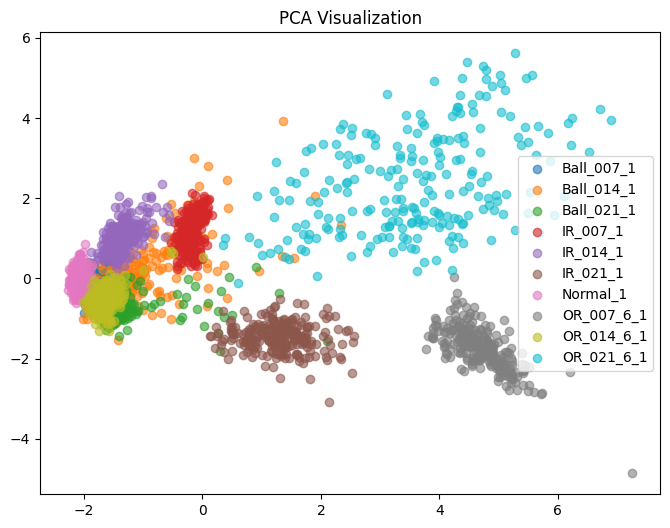

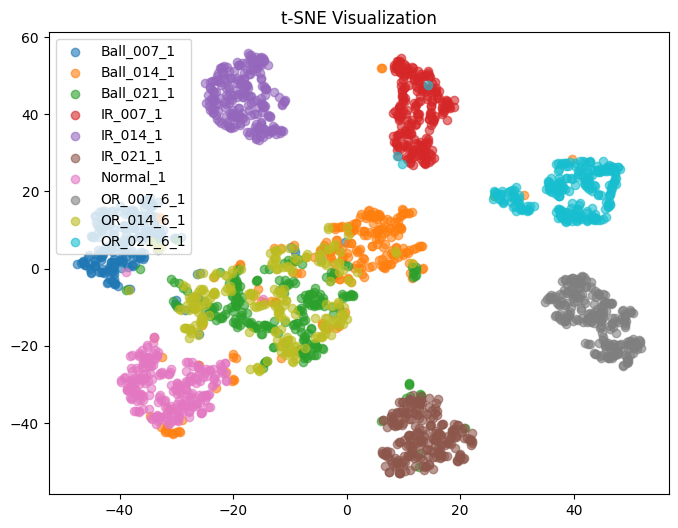

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# 假設 data 已經讀取成 pandas DataFrame
# 取出特徵與標籤
features = data_time.iloc[:, :-1]
labels = data_time.iloc[:, -1]

# 標準化數據
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# PCA 降維到 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

# t-SNE 降維到 2D
tsne = TSNE(n_components=2, random_state=SEED)
tsne_result = tsne.fit_transform(features_scaled)

# 畫圖函數
def plot_embedding(embedding, labels, title):
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        idx = labels == label
        plt.scatter(embedding[idx, 0], embedding[idx, 1], label=label, alpha=0.6)
    plt.legend()
    plt.title(title)
    plt.show()

# 視覺化 PCA
plot_embedding(pca_result, labels.values, "PCA Visualization")

# 視覺化 t-SNE
plot_embedding(tsne_result, labels.values, "t-SNE Visualization")

Divide the into training and test set.

In [8]:
train_data, test_data = train_test_split(data_time, test_size = 750, stratify = data_time['fault'],
                                         random_state = SEED)
test_data['fault'].value_counts()

fault
Ball_007_1    75
Ball_014_1    75
Ball_021_1    75
IR_007_1      75
IR_014_1      75
IR_021_1      75
Normal_1      75
OR_007_6_1    75
OR_014_6_1    75
OR_021_6_1    75
Name: count, dtype: int64

In [9]:
train_data.shape, test_data.shape

((1550, 10), (750, 10))

Before applying SVM, it is always a better idea to scale the data.

In [10]:
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data.iloc[:,:-1])

In [11]:
_ = (test_data.iloc[:,:-1].values - scaler.mean_)/np.sqrt(scaler.var_)
__ = scaler.transform(test_data.iloc[:,:-1])
_ == __

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [12]:
# test_data_scaled = (test_data.iloc[:,:-1].values - scaler.mean_)/np.sqrt(scaler.var_)
test_data_scaled = scaler.transform(test_data.iloc[:,:-1])

We will check a grid of parameters to find the best one. For each parameter combination, 10 fold cross-validation is performed.

In [13]:
parameters = {"C":[1, 10, 50, 100, 300, 500],
             'gamma':[0.01, 0.05, 0.1, 0.5, 1, 5],
             'kernel':["rbf"]}

In [14]:
tuned_svm_clf = GridSearchCV(SVC(),parameters,n_jobs = -1, cv= 10)

In [15]:
tuned_svm_clf.fit(train_data_scaled, train_data['fault'])

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 300, 500],
                         'gamma': [0.01, 0.05, 0.1, 0.5, 1, 5],
                         'kernel': ['rbf']})

In [16]:
tuned_svm_clf.best_score_

0.9690322580645161

In [17]:
tuned_svm_clf.best_params_

{'C': 500, 'gamma': 0.05, 'kernel': 'rbf'}

Now we will used the best model to find test accuracy.

In [18]:
best_clf = tuned_svm_clf.best_estimator_
best_clf

SVC(C=500, gamma=0.05)

In [19]:
train_predictions = best_clf.predict(train_data_scaled)
test_predictions = best_clf.predict(test_data_scaled)

In [20]:
train_confu_matrix = confusion_matrix(train_data['fault'], train_predictions)
test_confu_matrix = confusion_matrix(test_data['fault'], test_predictions)

Train confusion matrix.

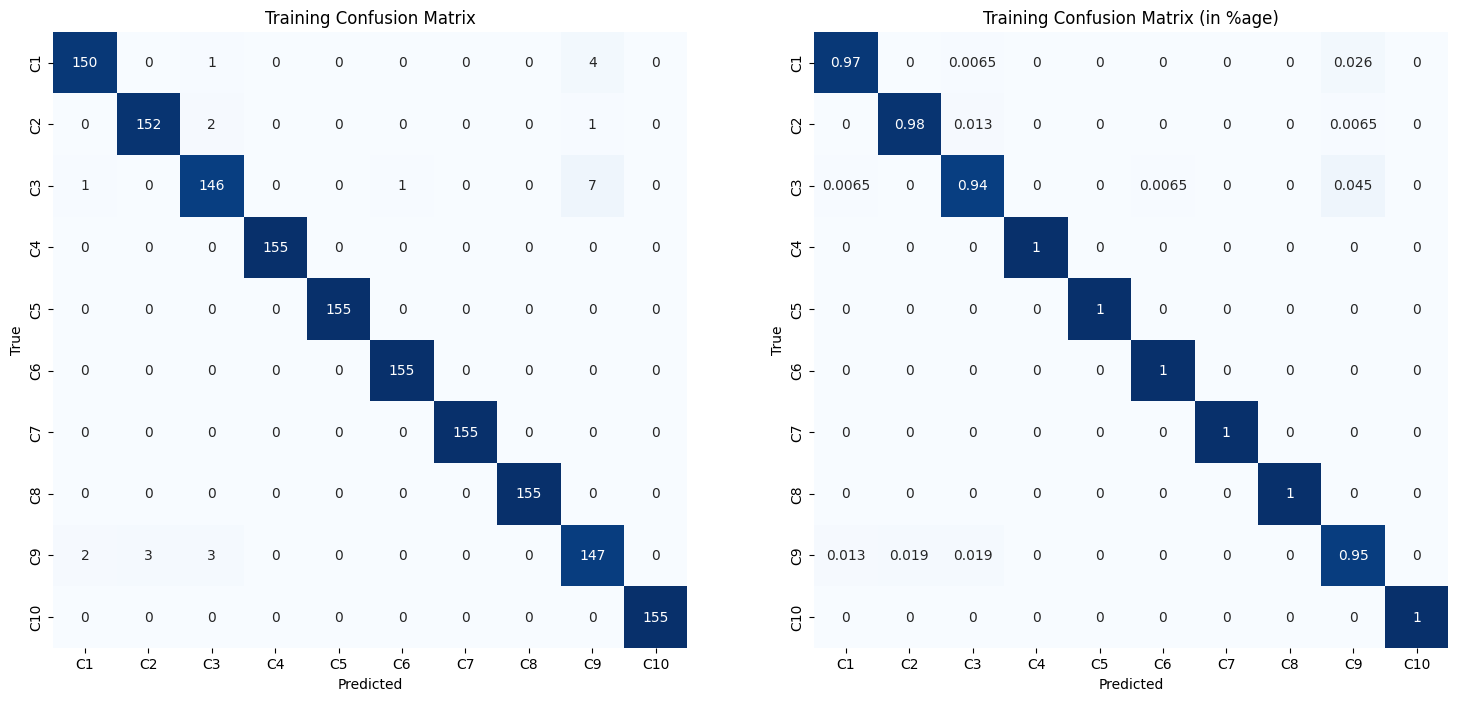

In [21]:
fault_type = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']
plt.figure(1,figsize=(18,8))
plt.subplot(121)
sns.heatmap(train_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(train_confu_matrix/155, annot= True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Test confusion matrix.

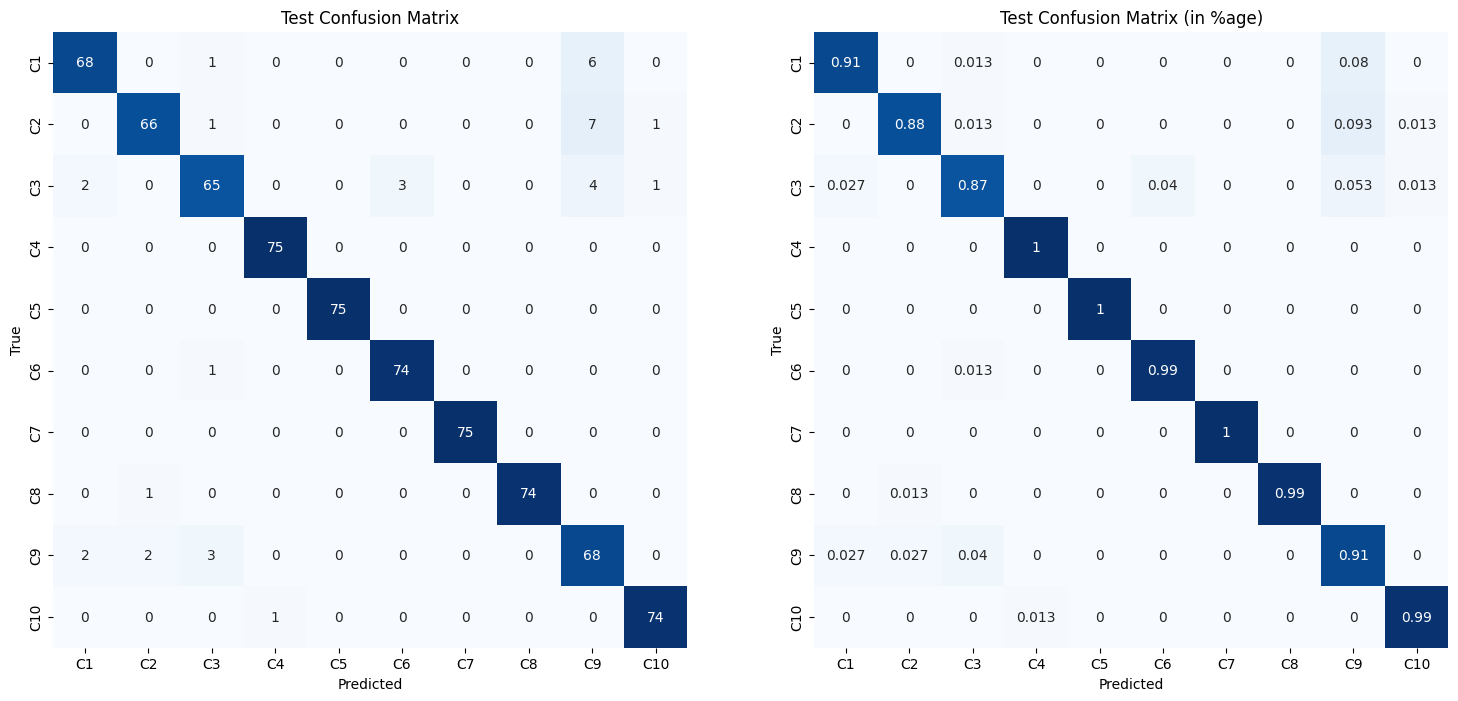

In [22]:
plt.figure(2,figsize=(18,8))
plt.subplot(121)
sns.heatmap(test_confu_matrix, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(test_confu_matrix/75, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [23]:
overall_test_accuracy = accuracy_score(test_data['fault'], test_predictions)
print("Overall test accuracy: ", overall_test_accuracy)

Overall test accuracy:  0.952


The overall test accuracy is 96.53% which is pretty satisfactory considering the fact that we are only taking time domain features. We will show in the next post that accuracy improves even further when wavelet features are used. Check [this page](https://biswajitsahoo1111.github.io/cbm_codes_open/) for other methods.

In [24]:
train_predictions

array(['Normal_1', 'IR_021_1', 'Ball_014_1', ..., 'OR_014_6_1',
       'IR_014_1', 'Ball_007_1'], dtype=object)